In [122]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import weatherdataprocesstool as wt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# 資料處理

In [123]:
dataset_rmoutliers=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea_traindata.pickle')
dataset_rmoutliers=dataset_rmoutliers.drop(columns='return')
dataset_rmoutliers

,temp,dewp,slp,stp,visib,wdsp,mxpsd,prcp,extremeClimate,SOI,ONI,win
date2,,,,,,,,,,,,
1960-10-01,66.875000,55.778792,1017.307101,978.853652,11.429213,5.440449,11.361938,0.033770,0.416667,0.7,0.3,0
1960-11-01,53.657415,42.820816,1015.844741,976.825442,11.585170,6.127891,12.219592,0.028587,0.000000,0.1,0.2,0
1960-12-01,41.146414,31.352321,1017.186812,977.648310,11.843882,8.298734,14.853165,0.013307,0.652174,0.5,0.1,0
1961-01-01,24.996599,16.564169,1022.888499,982.378367,11.582313,8.156599,14.056599,0.012834,0.375000,0.8,0.1,1
1961-02-01,21.924420,13.208322,1021.742777,981.015825,11.195225,6.951296,13.064802,0.003178,0.826087,-0.3,0.0,1
1961-03-01,31.209050,23.928356,1019.186025,979.020664,9.651131,7.307994,13.360332,0.023080,0.416667,0.9,0.0,1
1961-04-01,39.140353,30.250408,1014.358205,974.824592,10.855978,9.223505,16.079484,0.067051,0.583333,-1.8,0.0,0
1961-05-01,44.790449,32.630056,1011.903188,972.676231,11.581742,9.189185,16.287360,0.056295,0.916667,0.8,0.1,1
1961-06-01,56.656540,42.643597,1016.792567,977.926567,12.688965,8.247684,15.279428,0.055288,0.478261,0.3,0.2,1


In [135]:
X, y = dataset_rmoutliers.iloc[:, :-1].values, dataset_rmoutliers.iloc[:, -1].values

# #分割資料成4部分
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=0.1, 
#                      stratify=y,
#                      random_state=1)


select = dataset_rmoutliers.index.get_level_values('date2') < '2012'
X_train = X[select]
X_test= X[~select]
y_train = y[select]
y_test = y[~select]

# 標準化資料
sc = StandardScaler()#標準化物件
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 看PCA變化

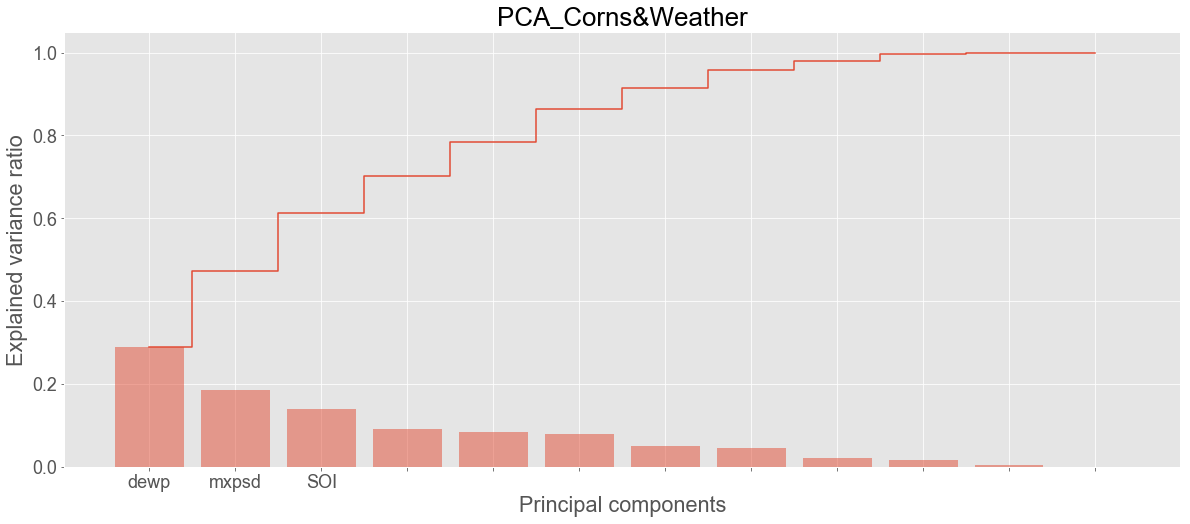

In [136]:

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['font.size']=18

pca_show = PCA()#n_components設為0，看所有屬性影響值
X_train_pca = pca_show .fit_transform(X_train_std)

#PCA_Feature 排行
# number of components
n_pcs= pca_show.components_.shape[0]
# # get the index of the most important feature on EACH component i.e. largest absolute value
# # using LIST COMPREHENSION HERE
most_important = [np.abs(pca_show.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names =dataset_rmoutliers.columns.tolist()
# # get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# pca_show .explained_variance_ratio:看所有屬性影響值
plt.bar(range(1, len(dataset_rmoutliers.columns)), pca_show.explained_variance_ratio_, alpha=0.5, align='center')
plt.xticks([i for i in range(1,len(dataset_rmoutliers.columns))],most_important_names[:3])
#階梯圖
plt.step(range(1, len(dataset_rmoutliers.columns)), np.cumsum(pca_show .explained_variance_ratio_), where='mid')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA_Corns&Weather')
plt.show()


# 訓練模型

In [137]:
#降維
pca = PCA(n_components=3)#降到2維,n_components為控制維度變數
X_train_pca = pca.fit_transform(X_train_std)#標準化
X_test_pca = pca.transform(X_test_std)#標準化

#套入選取器
svm = SVC(C=1.0, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
#C一般可以选择为：10^t , t=[- 4，4]就是0.0001 到10000。选择的越大，表示对错误例惩罚程度越大，可能会导致模型过拟合
svm.fit(X_train_pca, y_train)

# #繪圖
# wt.plot_decision_regions(X_train_pca, y_train, classifier=svm)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('SVM_Train_Accuracy_Corns&Weather')
# plt.legend(loc='lower left')
# plt.tight_layout()
# # plt.savefig('images/05_04.png', dpi=300)
# plt.show()

from sklearn.metrics import accuracy_score
y_pred= svm .predict(X_train_pca)# 顯示預測標籤
print('Accuracy: %.2f' % accuracy_score(y_train, y_pred))# 顯示預測準確度，y_test為實際結果，y_pred為預測值


Accuracy: 0.54


# 呈現test分佈圖

In [138]:
# 呈現test分佈圖
# wt.plot_decision_regions(X_test_pca, y_test, classifier=svm)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('SVM_Test_Accuracy_Corns&Weather')
# plt.legend(loc='lower left')
# plt.tight_layout()
# # plt.savefig('images/05_05.png', dpi=300)
# plt.show()

from sklearn.metrics import accuracy_score
y_pred= svm.predict(X_test_pca)# 顯示預測標籤
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))# 顯示預測準確度，y_test為實際結果，y_pred為預測值

Accuracy: 0.58


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


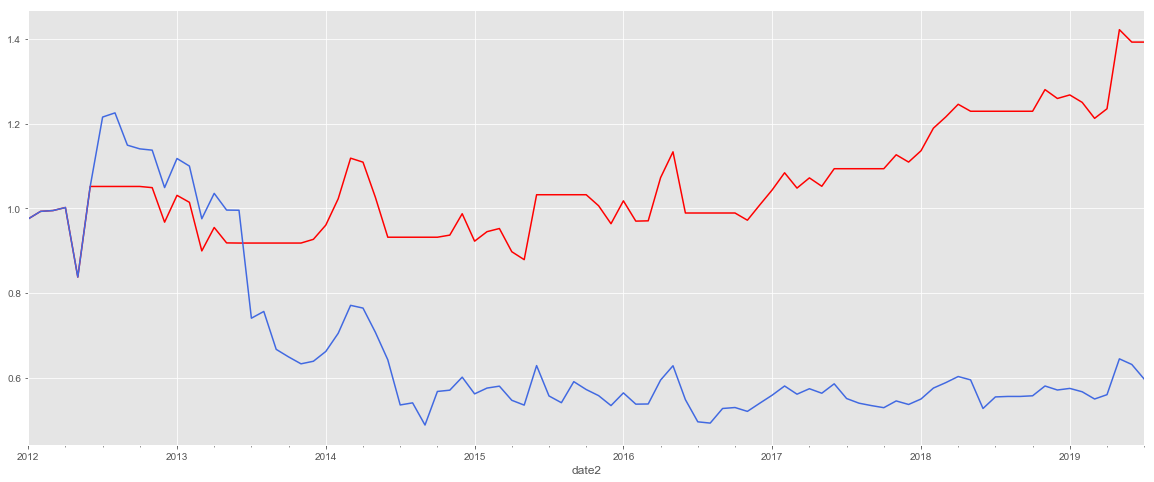

In [139]:
dataset_rmoutliers=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea_traindata.pickle')
#回測年份
select = dataset_rmoutliers.index.get_level_values('date2') < '2012'
df_bt=dataset_rmoutliers[~select]

#帶入模型訊號
df_bt['model_single']=y_pred
df_bt_model=df_bt[df_bt['model_single']==1]

#模型回測報酬率計算
df_bt_model['model_backtest']=df_bt_model['return'].cumprod()
df_bt=pd.concat([df_bt,df_bt_model['model_backtest']],axis=1)
df_bt['model_backtest']=df_bt['model_backtest'].fillna(method='ffill')

#無腦持有報酬率變化
df_bt['real_return']=df_bt['return'].cumprod()

plt.style.use("ggplot")
df_bt['model_backtest'].plot(color='red')
df_bt['real_return'].plot(color='royalblue')

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,